In [140]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [155]:
def fLowFreqRaw(x, a):
    return [1 if x[i]<a else 0 for i in range(len(x))]

def fHighFreqRaw(x, a):
    return [0 if x[i]<a else 1 for i in range(len(x))]

def fBandPassFreqRaw(x, a, b):
    return [0 if (x[i]<a)or(x[i]>b) else 1 for i in range(len(x))]

def fBandStopRaw(x, a,b):
    return [1 if (x[i]<a)or(x[i]>b) else 0 for i in range(len(x))]

def freq(x: np.array):
    return np.fft.fftfreq(x.size, d=x[1]-x[0])

def slideringMean(x, N):
    res = np.zeros(len(x))
    addPart = np.zeros(N);
    modified = np.concatenate([addPart,x,addPart])
    for i in range(len(x)):
        shard = np.zeros(2*N)
        for j in range(2*N):
            shard[j] = modified[i+j]
        res[i] = np.mean(shard)
    return res

def drawSlidering(x, func, N):
    plt.figure(figsize=(14,4))
    plt.subplot(1,2,1)
    plt.title("Функция до фильтрации")
    plt.plot(x, func)
    plt.subplot(1,2,2)
    plt.title("Функция после фильтрации")
    plt.plot(x, slideringMean(func, N))

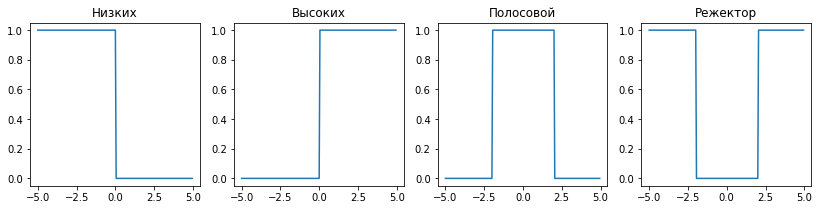

In [156]:
x = np.arange(-5,5,0.05)
w = freq(x)

plt.figure(figsize=(14,3))

plt.subplot(1,4,1)
plt.title("Низких")
plt.plot(x, fLowFreqRaw(x, 0))

plt.subplot(1,4,2)
plt.title("Высоких")
plt.plot(x, fHighFreqRaw(x, 0))

plt.subplot(1,4,3)
plt.title("Полосовой")
plt.plot(x, fBandPassFreqRaw(x, -2, 2))

plt.subplot(1,4,4)
plt.title("Режектор")
plt.plot(x, fBandStopRaw(x, -2, 2))


In [157]:
def funcFiltr(x, func, filter):  
    furier_ideal = np.concatenate([filter[:int(len(w)/2)], np.flip(filter[:int(len(w)/2)])])
    fil = np.fft.ifft(furier_ideal)
    tmp = np.split(fil, 2)
    ideal_filter = np.concatenate([tmp[1], tmp[0]])
    real_filter = ideal_filter*fBandPassFreqRaw(x,-0.8,0.8)
    furier_real_filter = np.fft.fft(real_filter);
    funcAfter = np.convolve(real_filter, func , 'same')
    
    plt.figure(figsize=(14,4))
    plt.subplot(1,2,1)
    plt.title("Функция до фильтрации")
    plt.plot(x, func)
    plt.subplot(1,2,2)
    plt.title("Функция после фильтрации")
    plt.plot(x, np.real(funcAfter))
    
    plt.figure(figsize=(14,4))
    plt.subplot(1,2,1)
    plt.title("Спектр функции до фильтрации")
    plt.scatter(w, np.abs(np.fft.fft(func)))
    plt.subplot(1,2,2)
    plt.title("Спектр функции после фильтрации")
    plt.scatter(w, np.abs(np.fft.fft(funcAfter)))
    
    plt.figure(figsize=(14,4))
    plt.subplot(1,2,1)
    plt.title("Фурье идеального фильтра")
    plt.scatter(w, furier_ideal)
    plt.subplot(1,2,2)
    plt.title("Фурье реального фильтра")
    plt.scatter(w, np.abs(furier_real_filter))
    
    plt.figure(figsize=(14,4))
    plt.subplot(1,2,1)
    plt.title("Идеальный фильтр")
    plt.plot(x, np.abs(ideal_filter))
    plt.subplot(1,2,2)
    plt.title("Реальный фильтр")
    plt.plot(x,  np.abs(real_filter))

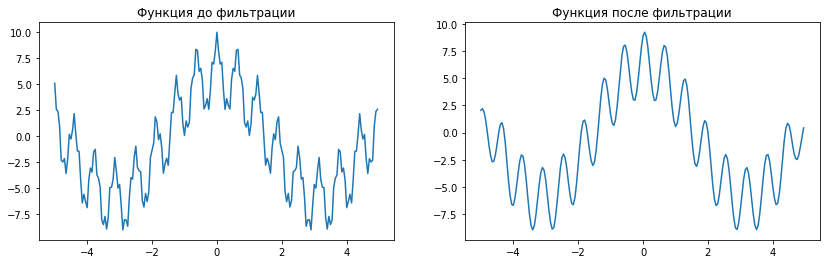

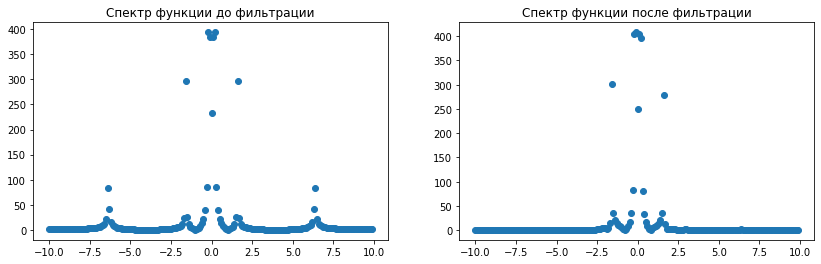

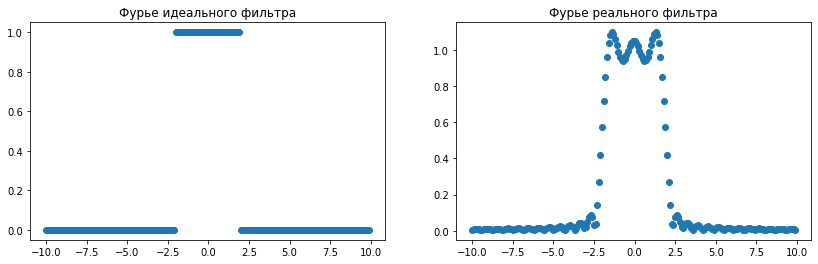

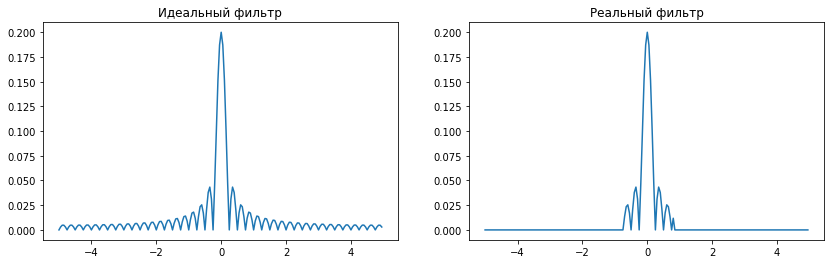

In [173]:
def testFunc1(x):
    return [6*np.cos(x[i])+3*np.cos(10*x[i])+np.cos(40*x[i])   for i in range(len(x))]

def testFunc2(x):
    return [np.random.uniform(len(x)-i) for i in range(len(x))]

def testFunc3(x):
    return [np.random.uniform(len(x)) for i in range(len(x))]

def testFunc4(x):
    return [1 if (i//20)%2==0 else 0 for i in range(len(x))]


funcFiltr(x, testFunc1(x), fLowFreqRaw(w,2))

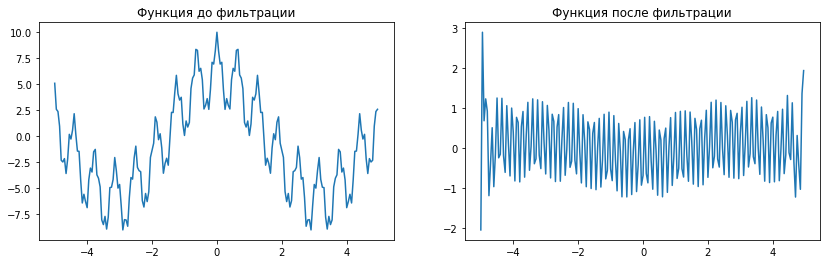

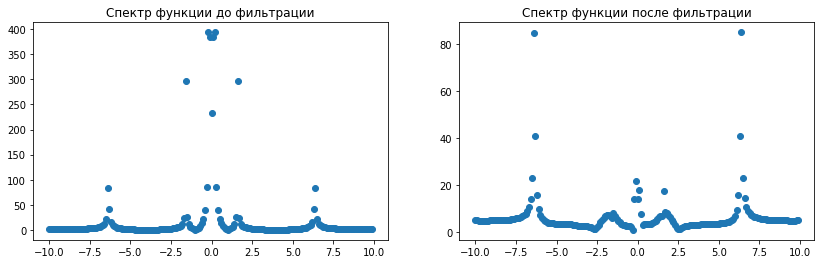

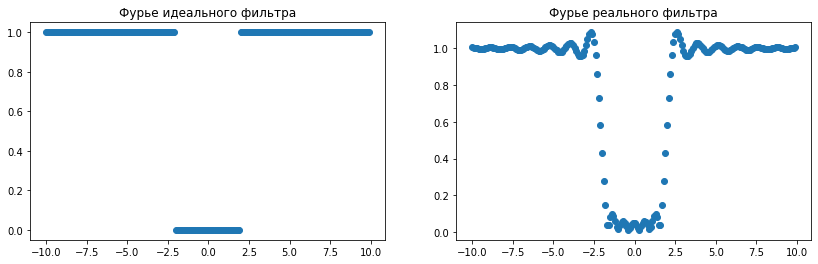

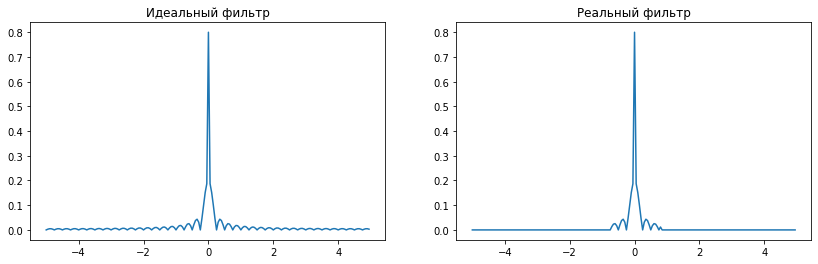

In [159]:
funcFiltr(x, testFunc1(x), fHighFreqRaw(w, 2))

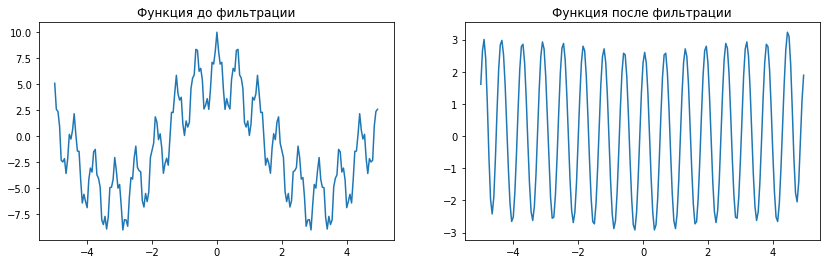

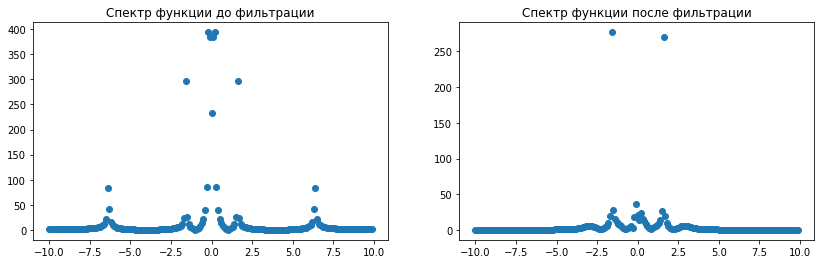

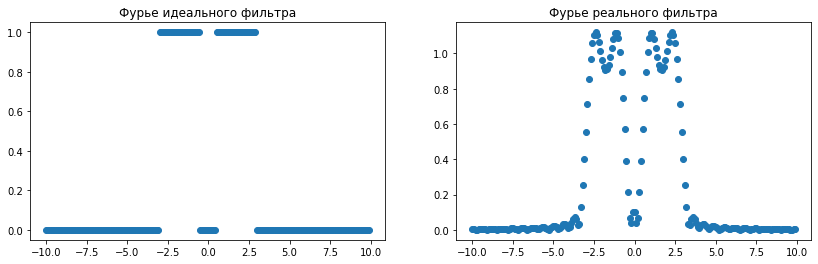

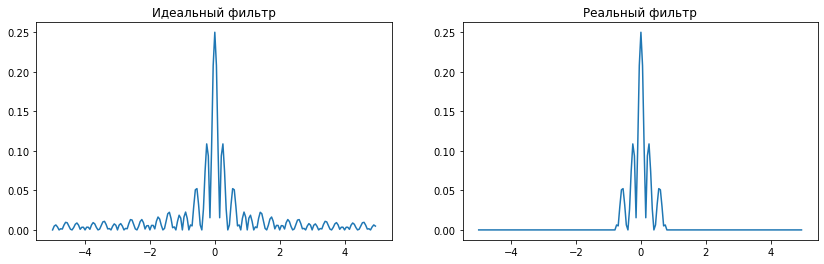

In [160]:
funcFiltr(x, testFunc1(x), fBandPassFreqRaw(w, 0.5,3))

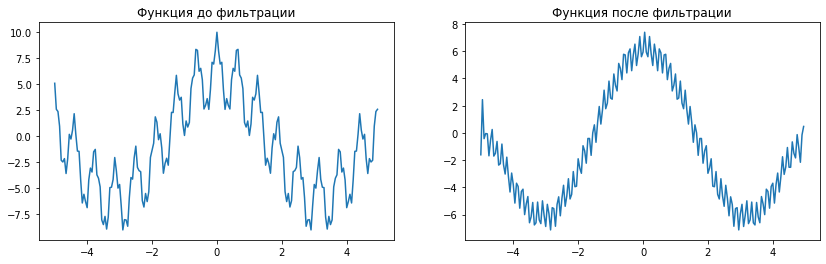

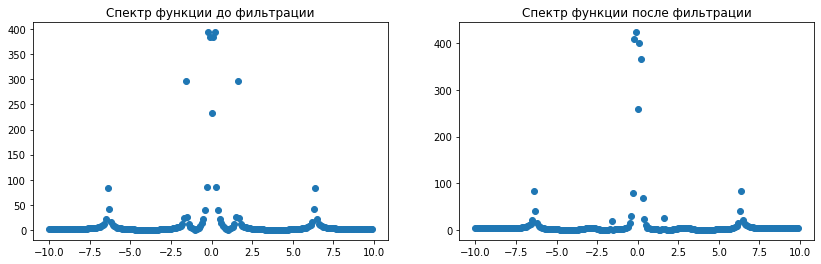

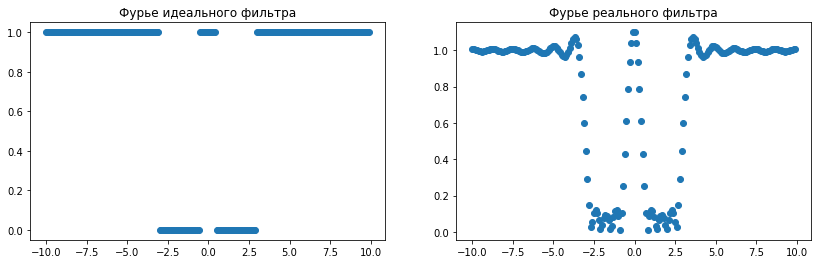

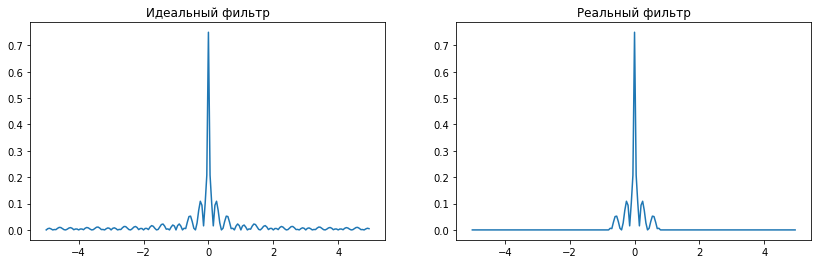

In [161]:
funcFiltr(x, testFunc1(x), fBandStopRaw(w, 0.5, 3))

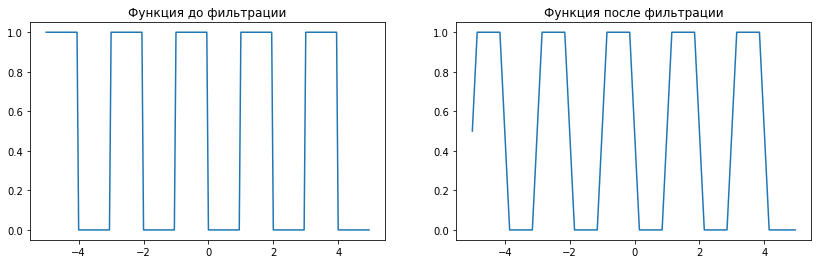

In [177]:
drawSlidering(x, testFunc4(x), 3)